In [ ]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 18.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0623d8ca3d40e3897131ef1805702269914cc860a59afcdb4f0ea4d09b68d148
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
! pip install plotly==5.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 27.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
                                                ####Importing Libraries####
import numpy as np
import pandas as pd
import pandas_profiling as pp
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import cross_val_score

<ipython-input-2-9dca8ac4e50f>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [ ]:
# Read in the data
with open("/content/Electric_cars_dataset.csv",'r') as file:
    ecars = pd.read_csv(file)

In [ ]:
ecars.isnull().sum()

ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               6
Model Year                                             7
Make                                                   4
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                     510
Electric Utility                                     722
Expected Price ($1k)           

In [ ]:
ecars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [ ]:
ecars.describe()

ZIP Code    Model Year  Electric Range      Base MSRP  \
count  64347.000000  64346.000000    64353.000000   64353.000000   
mean   98143.452888   2018.186212      106.948985    2524.990754   
std     2856.064329      2.726742      104.093919   12402.895104   
min      745.000000   1993.000000        0.000000       0.000000   
25%    98052.000000   2017.000000       14.000000       0.000000   
50%    98121.000000   2018.000000       73.000000       0.000000   
75%    98370.000000   2021.000000      215.000000       0.000000   
max    99701.000000   2022.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  
count          64184.000000    6.435300e+04  
mean              29.951904    1.972905e+08  
std               14.661124    1.069466e+08  
min                0.000000    4.385000e+03  
25%               19.000000    1.372865e+08  
50%               34.000000    1.753776e+08  
75%               43.000000    2.299039e+08  
max               49.000000    4.789346e+08

In [ ]:
# Generate the profile report
#profile = pp.ProfileReport(ecars, title='Electric Cars')

# Display the report
#profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
##'County','City','State','Make','Model','Vehicule Location','Electric Utility','Model Year','Legislative District','ZIP Code' : Replacing nans with the mode value
mode_columns= ['County','City','State','Make','Model','Electric Utility', 'Model Year' , 'Legislative District','ZIP Code']
for column in mode_columns:
    mode = ecars[column].mode()[0]
    ecars[column].fillna(mode, inplace=True)

In [ ]:
##'Vehicule Location' : Dropping the column
ecars.drop('Vehicle Location', axis=1, inplace=True)

In [ ]:
##Searching for each distinct value within 'Expected Price ($1k)'
ecars['Expected Price ($1k)'].unique()

array(['50', '15', '18', '33.9', '41.78', '16.365', '31.5', '65', '19',
       '27', '40', '39.9', '41.5', '25.004', '73', '79.596', '72', '39',
       '16', '33', '64', '69', '16.251', '29.998', '20.004', '13.9', '35',
       '102', '54', '78', '38', '21', '85', '45.6', '57', '69.2', '20',
       '14.5', '24.283', '22.2', '36.98', '73.9', '28', '60.2', '26.22',
       '25', '60', '43', '17', '20.5', '10.042', '31.67', '36.6', '33.89',
       '136.8', '21.998', '13.3', '30', '18.5', '22.857', '15.6', '27.4',
       '18.058', '30.8', '42.8', '142', '9.035', '63.4', '37.413', '42',
       '62', '59.979', '11.75', '80', '13.115', '70', '22.3', '38.5',
       '16.5', '29.49', '21.3', '18.374', '95', '40.9', '90', '22',
       '82.5', '20.6', '20.9', '28.2', '34.5', '32.1', '36.5', '45',
       '30.152', '96', '24', '46.5', '23', '37.3', '37', '67.07', '51.57',
       '26', '105', '5.499', '18.6', '65.9', '21.9', '7', '119.8',
       '21.258', '8.9', '24.69', '15.5', '16.999', '18.86', '30.

In [ ]:
##Converting 'Expected Price ($1k)' to numeric and replacing non-convertible values with NaN
ecars['Expected Price ($1k)'] = pd.to_numeric(ecars['Expected Price ($1k)'],errors='coerce')

In [ ]:
##'Expected Price ($1k)': Replacing NaNs with the mean value
ecars['Expected Price ($1k)'].fillna(ecars['Expected Price ($1k)'].mean(), inplace=True)

In [ ]:
# Detect duplicate rows
duplicates = ecars.duplicated()

# Calculate the sum of duplicated rows
sum_of_duplicates = duplicates.sum()
sum_of_duplicates

0

In [ ]:
##feature selection
column_selection=['Model Year','Make','Model','Electric Vehicle Type',
                'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                'Electric Range','Legislative District','DOL Vehicle ID','Electric Utility',
                'Expected Price ($1k)']
new_ecars=ecars[column_selection]

In [ ]:
                                  ####Calculating the Z Score of each feature####
from scipy import stats

z_scores_Electric_Range = stats.zscore(new_ecars['Electric Range'])
z_scores_Legislative_District = stats.zscore(new_ecars['Legislative District'])
z_scores_DOL_Vehicle_ID = stats.zscore(new_ecars['DOL Vehicle ID'])
z_scores_Expected_Price = stats.zscore(new_ecars['Expected Price ($1k)'])
z_score_threshold = 3

In [ ]:
                                  ####Calculating how many outliers are in each Feature####
outliers_Electric_Range = (abs(z_scores_Electric_Range) > z_score_threshold).sum()
outliers_Legislative_District = (abs(z_scores_Legislative_District) > z_score_threshold).sum()
outliers_DOL_Vehicle_ID = (abs(z_scores_DOL_Vehicle_ID) > z_score_threshold).sum()
outliers_Expected_Price = (abs(z_scores_Expected_Price) > z_score_threshold).sum()

print(f'Outliers in Electric_Range: {outliers_Electric_Range}')
print(f'Outliers in Legislative_District: {outliers_Legislative_District}')
print(f'Outliers in DOL_Vehicle_ID: {outliers_DOL_Vehicle_ID}')
print(f'Outliers in Expected_Price: {outliers_Expected_Price}')

Outliers in Electric_Range: 0
Outliers in Legislative_District: 0
Outliers in DOL_Vehicle_ID: 0
Outliers in Expected_Price: 483


In [ ]:
                                    #Removing the rows with outliers from our DataSet
Expected_Price_outlier=(abs(z_scores_Expected_Price) > z_score_threshold)
updated_ecars = new_ecars[~Expected_Price_outlier]


In [ ]:
##Transform the columns using LabelEncoder

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in updated_ecars.columns:
    if updated_ecars[column].dtype == 'object':
        updated_ecars[column] = label_encoder.fit_transform(updated_ecars[column])

<ipython-input-14-5d5e6c7c2799>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_ecars[column] = label_encoder.fit_transform(updated_ecars[column])
<ipython-input-14-5d5e6c7c2799>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_ecars[column] = label_encoder.fit_transform(updated_ecars[column])
<ipython-input-14-5d5e6c7c2799>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [ ]:
updated_ecars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63870 entries, 0 to 64352
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Model Year                                         63870 non-null  float64
 1   Make                                               63870 non-null  int64  
 2   Model                                              63870 non-null  int64  
 3   Electric Vehicle Type                              63870 non-null  int64  
 4   Clean Alternative Fuel Vehicle (CAFV) Eligibility  63870 non-null  int64  
 5   Electric Range                                     63870 non-null  int64  
 6   Legislative District                               63870 non-null  float64
 7   DOL Vehicle ID                                     63870 non-null  int64  
 8   Electric Utility                                   63870 non-null  int64  
 9   Expect

In [ ]:
                        ####Finding the Correlations between Expected Price ($1k) and all the other features####
correlations= updated_ecars.corrwith(updated_ecars["Expected Price ($1k)"],method="pearson")
sorted_correlations = correlations.sort_values(ascending=False)
print(sorted_correlations)

Expected Price ($1k)                                 1.000000
Model Year                                           0.572005
Make                                                 0.564868
Electric Range                                       0.258461
Model                                                0.127236
Electric Utility                                     0.085492
Legislative District                                 0.056966
DOL Vehicle ID                                      -0.016115
Clean Alternative Fuel Vehicle (CAFV) Eligibility   -0.074302
Electric Vehicle Type                               -0.418532
dtype: float64


The Target feature in our Data Set is Expected Price ($1k) .

The highest correlated features to Expected Price ($1k) are :

•Model Year 0.572005

•Make 0.564868

•Electric Range 0.258461

•Electric Vehicle Type -0.418532

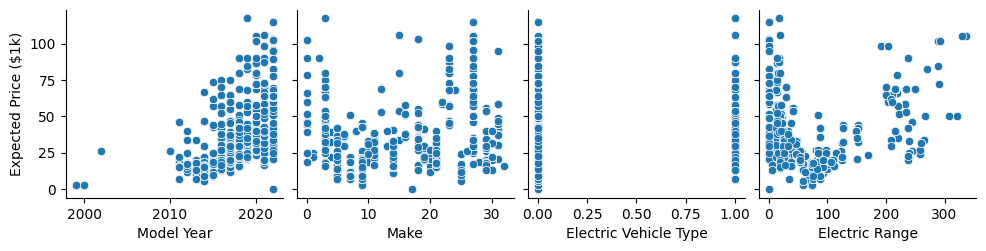

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot with 'CREDIT_LIMIT' and other features
sns.pairplot(updated_ecars, x_vars=['Model Year','Make','Electric Vehicle Type','Electric Range'], y_vars=['Expected Price ($1k)'])
plt.show()

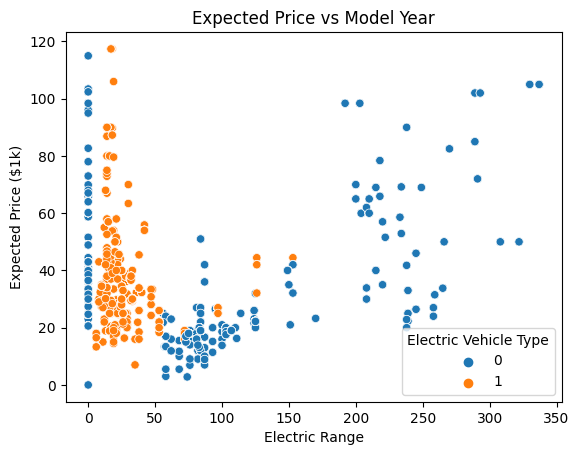

In [ ]:
# Scatter plot for 'Expected Price' vs 'Model Year'
sns.scatterplot(x='Electric Range', y='Expected Price ($1k)', hue='Electric Vehicle Type', data=updated_ecars)
plt.title('Expected Price vs Model Year')
plt.show()

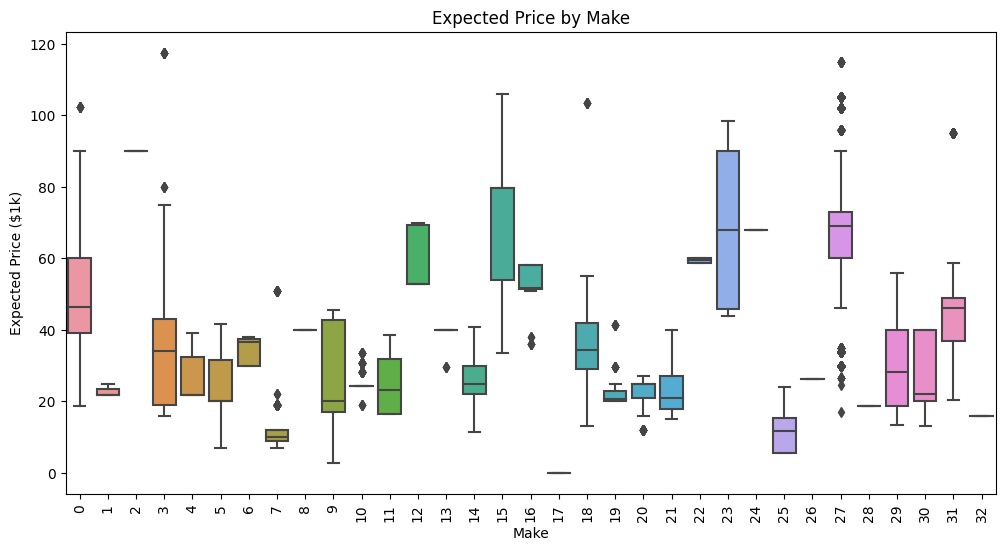

In [ ]:
# Box plot for 'Expected Price' by 'Make'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Expected Price ($1k)', data=updated_ecars)
plt.xticks(rotation=90)
plt.title('Expected Price by Make')
plt.show()

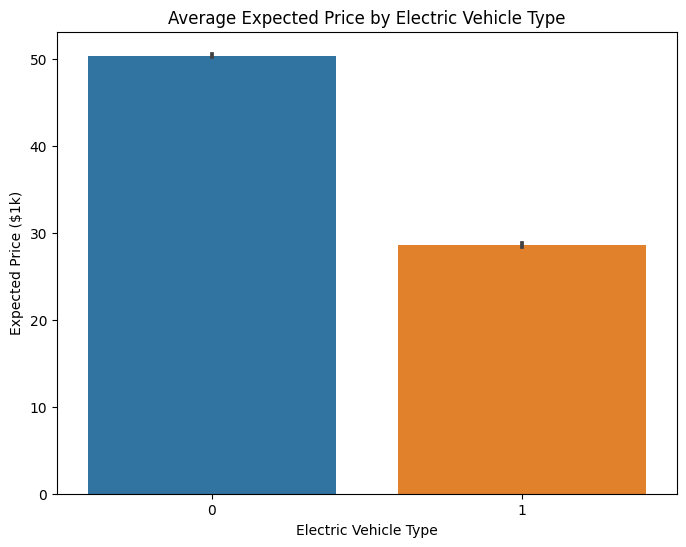

In [ ]:
# Bar plot for average 'Expected Price' by 'Electric Vehicle Type'
plt.figure(figsize=(8, 6))
sns.barplot(x='Electric Vehicle Type', y='Expected Price ($1k)', data=updated_ecars)
plt.title('Average Expected Price by Electric Vehicle Type')
plt.show()

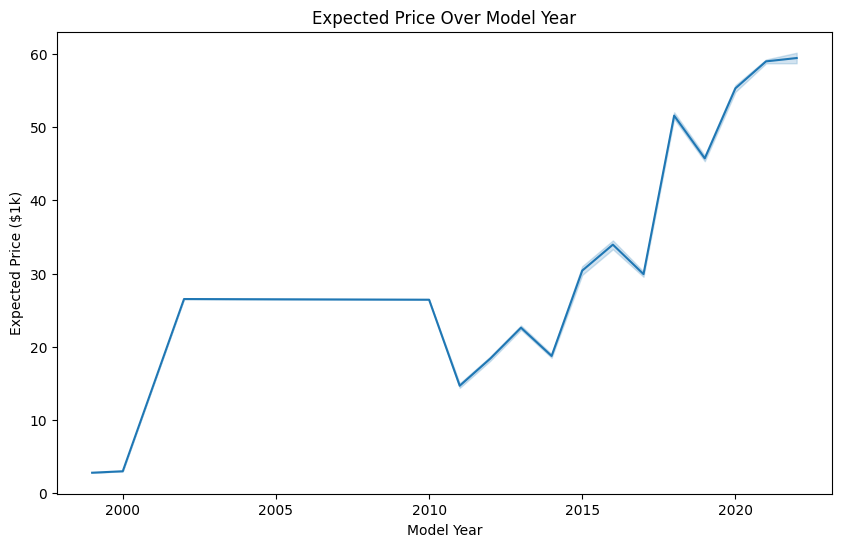

In [ ]:
# Line plot for 'Expected Price' over 'Model Year'
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model Year', y='Expected Price ($1k)', data=updated_ecars)
plt.title('Expected Price Over Model Year')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Select the highest correlated features and the target variable
selected_features = ['Model Year', 'Make', 'Electric Range', 'Electric Vehicle Type']
X = updated_ecars[selected_features]
y = updated_ecars['Expected Price ($1k)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the SVM model with the hyperparameters you want to tune
svm_model = SVR()

# Define the hyperparameter grid to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],  # Kernel types to try
    'C': [0.1, 1, 10],  # Regularization parameter (C) values to try
    'gamma': [0.1, 1, 10],  # Kernel coefficient (gamma) values to try
    'degree': [2, 3, 4]  # Degree for polynomial kernel (only for 'poly' kernel)
}

# Create the GridSearchCV object with the SVM model and hyperparameter grid
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best combination of hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (model) with the optimal hyperparameters
best_svr_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_svr_model.predict(X_test)

# Evaluate the model's performance with the optimal hyperparameters
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")


In [ ]:
# Create an SVR model
svr_model = SVR(kernel='linear', C=0.1)

# Train the SVR model on the training data
svr_model.fit(X_train, y_train)


In [ ]:
# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 232.29
R-squared (R2): 0.55
